# Algebra Lineal aplicada a la Ciencia de Datos

## Librerias

In [30]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from scipy.sparse.linalg import svds
from scipy.linalg import sqrtm
import networkx as nx

## Ejercicio 1

Utilizar la siguiente tabla que explica las preferencias de restaurantes de Alfonso, Brenda, Carlos y Diana para aplicar PCA tal como lo vimos en clase y explicar los resultados

|         | Italiana | Francesa | Mexicana | Japonesa |
|---------|----------|----------|----------|----------|
| Alfonso |    10    |     1    |     2    |     7    |
| Brenda  |     7    |     2    |     1    |    10    |
| Carlos  |     2    |     9    |     7    |     3    |
| Diana   |     3    |     6    |    10    |     2    |

In [2]:
X = np.array([
    [10, 1, 2,  7],
    [7,  2, 1, 10],
    [2,  9, 7,  3],
    [3,  6, 10, 2]
])

In [3]:
standarized = X - np.mean(X, axis=0)
cov = standarized @ standarized.T/X.shape[0]
cov

array([[ 10.9375,   8.5625, -10.3125,  -9.1875],
       [  8.5625,  11.1875,  -8.9375, -10.8125],
       [-10.3125,  -8.9375,  10.6875,   8.5625],
       [ -9.1875, -10.8125,   8.5625,  11.4375]])

In [4]:
eig_val, eig_vec = np.linalg.eig(cov)

In [5]:
print('Eigen valores:', eig_val)
print('Eigen vectores:', eig_vec)

Eigen valores: [3.92587241e+01 3.99291342e+00 7.98286130e-16 9.98362518e-01]
Eigen vectores: [[ 0.49611631  0.50762718  0.5        -0.49616857]
 [ 0.50376181 -0.49345547  0.5         0.50271835]
 [-0.48958265 -0.50644341  0.5        -0.50380939]
 [-0.51029547  0.49227169  0.5         0.4972596 ]]


In [6]:
idx = np.argsort(eig_val)[::-1]
eig_val = eig_val[idx]
eig_vec = eig_vec[:, idx]
pca = np.dot(X, eig_vec[:, range(2)])
print(pca)

[[ 0.91369133  7.01583139]
 [-1.11219956  6.98275286]
 [ 0.56812395 -5.49413361]
 [-1.40549766 -5.51774196]]


Los componentes obtenidos reflejas los restaurantes con votaciones similares o aquellos que estan correlacionados. Los restaurantes de comida Italiana y Japonesa, y Francesa y Mexicana son ejemplos de restaurantes con una valoracion parecida. 

## Ejercicio 2

Calcular el rango de las siguientes matrices asi como una aproximacion de grado 2, 3 y 5 respectivamente.

\begin{equation}
    \begin{bmatrix} 4 & 5 \\ 7 & 2 \end{bmatrix}
    \begin{bmatrix} 
    3 & 3 & 5 & 1 & 5  \\ 
    5 & 4 & 3 & 5 & 1  \\ 
    2 & 7 & 10 & 8 & 9 \\ 
    5 & 3 & 6 & 10 & 8 \\ 
    9 & 5 & 9 & 6 & 10 \\
    10 & 10 & 8 & 4 & 6
    \end{bmatrix}
    \begin{bmatrix} 
    5 & 1 & 3 & 9 & 3 & 10 & 3    \\ 
    5 & 4 & 1 & 7 & 8 & 3 & 2     \\
    3 & 7 & 2 & 1 & 9 & 2 & 8     \\
    2 & 5 & 3 & 10 & 10 & 1 & 7   \\
    10 & 3 & 5 & 8 & 7 & 10 & 10  \\
    9 & 2 & 10 & 3 & 8 & 3 & 4    \\
    5 & 10 & 3 & 7 & 9 & 4 & 9    \\
    8 & 7 & 4 & 6 & 7 & 8 & 9     \\
    \end{bmatrix}
\end{equation}


In [7]:
def get_range(X):
    U, D, V = np.linalg.svd(X)
    # No funciona con los filtros np.nonzero() y D>0. Validar con 1*e-10
    non_zero = D[D>1e-10]
    return len(non_zero)

### Primera matriz:

In [8]:
A = np.array([[4, 5], [7, 2]])

In [9]:
print('El rango de A es', get_range(A))

El rango de A es 2


### Segunda matriz:

In [10]:
B = np.array([[3, 3, 5, 1, 5], 
              [5, 4, 3, 5, 1],
              [2, 7, 10, 8, 9],
              [5, 3, 6, 10, 8],
              [9, 5, 9, 6, 10],
              [10, 10, 8, 4, 6]
             ])

In [11]:
print('El rango de B es', get_range(B))

El rango de B es 5


In [12]:
U_k, sigmas_k, Vt_k = svds(B.astype(float), k=3)
D_k = np.diag(sigmas_k)

In [13]:
B_aprox =  np.matmul(sqrtm(D_k), Vt_k) 
B_aprox.shape

(3, 5)

In [14]:
B_aprox

array([[ 1.11640152, -0.5004949 , -1.01097103,  1.5684416 , -0.8176254 ],
       [ 1.83893873,  1.21342841, -0.20530918, -1.56618303, -0.98238838],
       [-2.43412972, -2.31003739, -2.98846898, -2.44005639, -2.89513336]])

### Tercera matriz:

In [15]:
C = np.array([
        [5,  1,  3,  9,  3,  10, 3 ],
        [5,  4,  1,  7,  8,  3,  2 ],
        [3,  7,  2,  1,  9,  2,  8 ],
        [2,  5,  3,  10, 10, 1,  7 ],
        [10, 3,  5,  8,  7,  10, 10],
        [9,  2,  10, 3,  8,  3,  4 ],
        [5,  10, 3,  7,  9,  4,  9 ],
        [8,  7,  4,  6,  7,  8,  9 ]
])

In [16]:
print('El rango de C es', get_range(C))

El rango de C es 7


In [17]:
U_k, sigmas_k, Vt_k = svds(C.astype(float), k=5)
D_k = np.diag(sigmas_k)

In [18]:
C_aprox =  np.matmul(sqrtm(D_k), Vt_k) 
C_aprox.shape

(5, 7)

In [19]:
C_aprox

array([[ 0.75564885,  0.94258412, -0.58521029, -0.31091255,  0.34236264,
         0.35611411, -1.38333539],
       [ 0.10297746,  0.90731407, -0.85246082, -1.47067309, -1.04699079,
         1.12485339,  1.39610383],
       [-1.24217272,  0.30602243, -1.86085653,  1.99194943, -0.40744192,
         0.73426722, -0.04231378],
       [-1.26211105,  1.78859778, -0.67141623, -0.5769346 ,  1.4956339 ,
        -2.14321559,  0.76142552],
       [ 2.56020617,  2.10297879,  1.65974403,  2.70814772,  3.18903329,
         2.25028451,  2.88919002]])

## Ejercicio 3

Calcular el algoritmo de PageRank para el siguiente grafo:

<img src='graph.jpg' width=30%/>

Creando conexiones estáticas:

In [20]:
EDGE_DATA = [(0,1), (0,2), (0,3), (0,4),
             (1,0), (1,2),
             (2,0), (2,3),
             (3,0), (3,1),
             (4,5), (4,7),
             (5,0), (5,6),
             (6,4),
             (7,6), (7,8),
             (8,4), (8,9), (8,10),(8,11),
             (9,8), (9,10),
             (10,8), (10,11),
             (11,9), (11,8)
            ]

Instanciando objeto Networkx:

In [21]:
g = nx.DiGraph() 

N = 12
g.add_nodes_from(range(N)) 
g.add_edges_from(EDGE_DATA)

Dibujando:

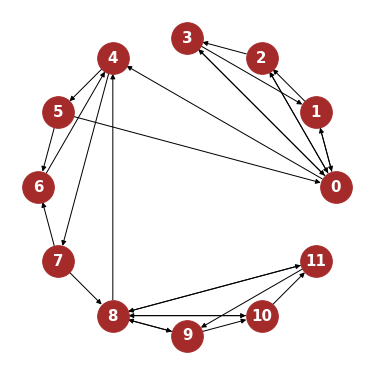

In [22]:
plt.figure(figsize=(5,5))

params={
    'with_labels': True, 
    'node_size': 1000, 
    'font_color': 'white',
    'font_size': 15, 
    'font_weight': 'bold', 
    'node_color': 'brown'
}
nx.draw_circular(g, **params)

In [23]:
print('Nodos:', g.nodes())
print('Número de Nodos:', g.number_of_nodes())
print('Total de Vertices:',g.number_of_edges())

Nodos: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
Número de Nodos: 12
Total de Vertices: 27


In [24]:
g.out_edges()

OutEdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (1, 0), (1, 2), (2, 0), (2, 3), (3, 0), (3, 1), (4, 5), (4, 7), (5, 0), (5, 6), (6, 4), (7, 6), (7, 8), (8, 4), (8, 9), (8, 10), (8, 11), (9, 8), (9, 10), (10, 8), (10, 11), (11, 9), (11, 8)])

### Page Rank, utilizando caminata aleatoria

In [31]:
def PageRank_caminata_aleatoria(g, n_iter):
    #inicialiaemos en 0 los cuenta para cada nodo
    cuenta = [0]*g.number_of_nodes()
    nodos = list(g.nodes()) 

    #escogemos un nodo aleatoriamente, probabilidad uniforme
    n = random.choice(nodos)
    cuenta[n] += 1

    #lista de vecinos a donde ir, probabilidad uniforme
    vecinos = list(g.out_edges(n))    
    #iterar n_iter veces
    z = 1
    while (z != n_iter): 
        #Si no hay vecinos escogemos cualquier vecino al azar
        if (len(vecinos) == 0):        
            siguiente = random.choice(nodos) 
        else:
            n1 = random.choice(vecinos) 
            siguiente = n1[1] 
        cuenta[siguiente] += 1
        vecinos = list(g.out_edges(siguiente)) 
        z += 1

    #Obtenemos los pesos de cada nodo
    pesos = np.array(cuenta) / n_iter   #vector r

    #Guardamos los resultados en una tabla ordenada por pesos
    rank = pd.DataFrame({'Nodo':nodos, 'Pesos':pesos}).sort_values('Pesos', ascending=False)
    rank.index = range(1, g.number_of_nodes() + 1)
    return pesos, rank

* Iteraciones:

In [44]:
iterations = np.linspace(2, 100000, 5, dtype=int)
for i in iterations:
    vec_r, pagerank, = PageRank_caminata_aleatoria(g, n_iter = i) 
    print(f'{i} iterations\n')
    print(vec_r,'\n')
    print('----------------------\n')

2 iterations

[0.  0.  0.  0.  0.  0.  0.  0.5 0.5 0.  0.  0. ] 

----------------------

25001 iterations

[0.12387504 0.06019759 0.06151754 0.0600776  0.13523459 0.06575737
 0.06831727 0.06947722 0.14227431 0.07059718 0.07143714 0.07123715] 

----------------------

50001 iterations

[0.13535729 0.06853863 0.06855863 0.06903862 0.13283734 0.06605868
 0.06597868 0.06679866 0.13327733 0.06567869 0.06425871 0.06361873] 

----------------------

75000 iterations

[0.13029333 0.06372    0.06404    0.06468    0.13526667 0.06652
 0.06744    0.06874667 0.13694667 0.06706667 0.06736    0.06792   ] 

----------------------

100000 iterations

[0.13395 0.06545 0.06785 0.06733 0.13159 0.06629 0.06557 0.0653  0.13411
 0.06778 0.06724 0.06754] 

----------------------



### Utilizando función pagerank de la biblioteca networkx

In [59]:
pesos_dict = nx.pagerank(g) 
p_ordenado = sorted(pesos_dict.items(), key=lambda x: x[1], reverse=True) 
  
print("PageRank using inbuilt pagerank method") 
for i in p_ordenado:  
    print(i[0], end=", ") 

PageRank using inbuilt pagerank method
0, 8, 4, 1, 2, 3, 9, 10, 11, 6, 5, 7, 